### Student Information
Name : 張正翰

Student ID : 113065538

GitHub ID : Andy109306070

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here

In [2]:
# Get Dataframe
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 
#This command also shuffles the data randomly, but with random_state we can bring the same distribution of data everytime 
#if we choose the same number, in this case "42". This is good for us, it means we can reproduce the same results every time
#we want to run the code.

import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [3]:
X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [4]:
# Ans

#get the raws which 'category' is '3'
X.loc[lambda X: X['category'] == 3]

text  category  \
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
...                                                 ...       ...   
2229  From: jcj@tellabs.com (jcj) Subject: Re: proof...         3   
2230  From: news@cbnewsk.att.com Subject: Re: Bible ...         3   
2246  From: lmvec@westminster.ac.uk (William Hargrea...         3   
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   

               category_name  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
5     soc.religion.christian  
6     soc.religion.christian  
...                      ...  
2229  soc.religion.christian  
2230  soc.religion.christian  
2246  soc.religion.christian  
2247  soc.religion.christian  
2249  soc.religion.christian  

[599 rows x 3 columns]

In [5]:
# Ans

#get the 10th and the 20th elements from the index in the ‘category_name’ column
X.loc[X.index[[10, 20]], 'category_name']

10    soc.religion.christian
20    soc.religion.christian
Name: category_name, dtype: object

---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [6]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [7]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

# Ans : 
Because pandas treats certain values as valid data types rather than as missing values. 
`NaN` of `C` and `None` of `D` are string, pandas considers its as valid data, so `.isnull()` returns `False`. 
`''` of `F` is an empty string, which pandas also treats as valid data, so `.isnull()` returns `False`.

---

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [8]:
X_sample = X.sample(n=1000) #random state
X_sample[0:10]

text  category  \
1122  From: marka@amber.ssd.csd.harris.com (Mark Ash...         3   
2085  From: dougb@comm.mot.com (Doug Bank) Subject: ...         2   
1109  From: mcovingt@aisun3.ai.uga.edu (Michael Covi...         2   
528   From: Eugene.Bigelow@ebay.sun.com (Geno ) Subj...         3   
475   Organization: Penn State University From: Andr...         0   
1243  From: mdw33310@uxa.cso.uiuc.edu (Michael D. Wa...         3   
1968  From: joachim@kih.no (joachim lous) Subject: R...         1   
2158  From: keith@cco.caltech.edu (Keith Allan Schne...         0   
1289  Subject: Fluids vs Liquids From: mikec@sail.LA...         0   
764   From: ron.roth@rose.com (ron roth) Subject: Se...         2   

               category_name  
1122  soc.religion.christian  
2085                 sci.med  
1109                 sci.med  
528   soc.religion.christian  
475              alt.atheism  
1243  soc.religion.christian  
1968           comp.graphics  
2158             alt.atheism  
1289             alt.atheism  
764                  sci.med

# Ans : 
`X_sample` adopt random selection from `X` but no replacement, and will not be arranged in order.

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

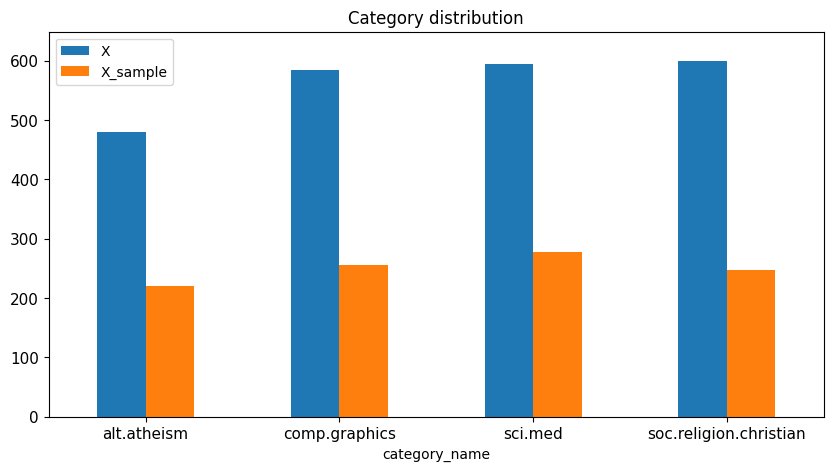

In [9]:
# Ans
import matplotlib.pyplot as plt
%matplotlib inline

# Create DataFrames for value counts
X_counts = X.category_name.value_counts()
X_sample_counts = X_sample.category_name.value_counts()

# Combine both series into a single DataFrame
df_counts = pd.DataFrame({'X': X_counts, 'X_sample': X_sample_counts}).fillna(0)

# Plot side-by-side bars
df_counts.plot(kind='bar', 
               title='Category distribution', 
               ylim=[0, max(df_counts.max()) + 50], 
               rot=0, fontsize=11, figsize=(10, 5))

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [10]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)
# analyze = count_vect.build_analyzer()

# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [11]:
#Ans

# Access the 5th row of the document-term matrix
fifth_record = X_counts[4, 0:100].toarray().flatten()

# Find the indices where the value is 1
indices_of_ones = fifth_record.nonzero()[0]

# Map the index of second '1' to the word
count_vect.get_feature_names_out()[indices_of_ones[1]]

'01'

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [12]:
# Ans

import numpy as np
from scipy.sparse import csr_matrix
from collections import Counter

# randomly choose 20 records
sample_docs = np.random.choice(X_counts.shape[0], size=20, replace=False)

# Calculate the sum of word frequencies in these files
sampled_matrix = X_counts[sample_docs].toarray()
term_frequencies = np.sum(sampled_matrix, axis=0)

# Find the index of the 20 words with the highest word frequency
top20_terms = np.argsort(term_frequencies)[-20:][::-1]

# Slice the matrix to get a 20x20 submatrix and convert it to a dense array
plot_z_sampled = X_counts[sample_docs][:, top20_terms].toarray()
plot_z_sampled

array([[ 3,  3,  4,  1,  2,  2,  3,  1,  0,  3,  2,  0,  1,  0,  1,  1,
         3,  0,  0,  2],
       [32,  9, 15,  8,  7,  6,  5,  3,  0,  4,  2,  4,  3,  1,  2,  2,
         2,  2,  0,  1],
       [ 2,  2,  0,  0,  1,  2,  2,  0,  2,  0,  3,  1,  1,  0,  0,  1,
         0,  0,  0,  0],
       [39, 29, 24, 31, 17, 24, 19, 25, 13, 24,  4, 11, 10, 17, 16,  5,
         7,  8,  4,  2],
       [ 2,  1,  1,  2,  0,  0,  0,  2,  1,  0,  3,  0,  1,  0,  0,  2,
         0,  0,  1,  0],
       [ 3,  2,  2,  1,  1,  1,  1,  1,  2,  0,  1,  0,  1,  0,  0,  1,
         1,  1,  0,  1],
       [ 3,  5,  0,  2,  4,  1,  4,  8,  1,  0,  2,  0,  3,  1,  2,  2,
         2,  2,  1,  0],
       [ 1,  3,  0,  2,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,
         0,  0,  1,  0],
       [ 4,  6,  9,  1,  8,  3,  0,  1,  9,  0,  2,  2,  1,  1,  2,  2,
         2,  3,  2,  4],
       [ 3,  2,  5,  2,  4,  2,  1,  0,  0,  3,  2,  2,  2,  1,  0,  2,
         1,  0,  0,  2],
       [ 4,  6,  0,  1,  3,  2

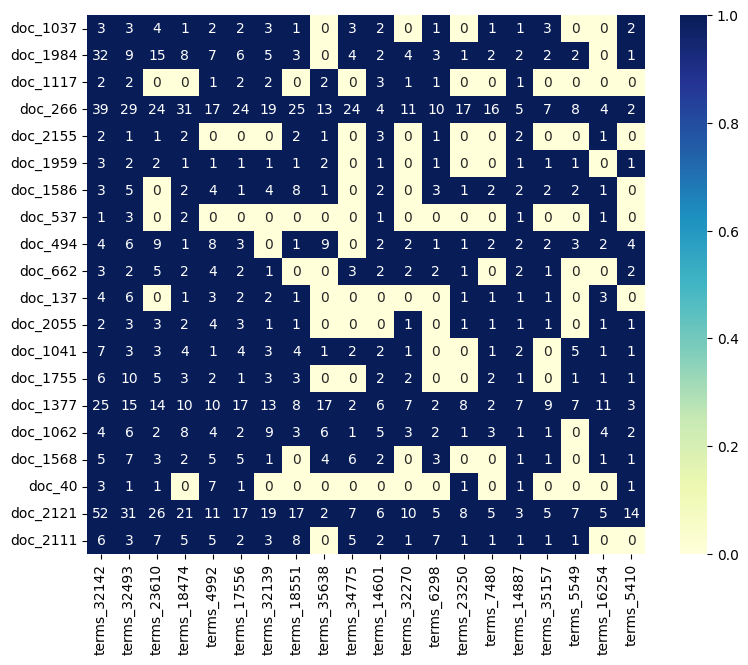

In [13]:
import seaborn as sns

# Create labels based on the indices
plot_x = ["terms_" + str(i) for i in top20_terms]
plot_y = ["doc_" + str(i) for i in sample_docs]

df_todraw = pd.DataFrame(plot_z_sampled, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="YlGnBu",
                 vmin=0, vmax=1, annot=True)

---

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [14]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [15]:
# Ans

import plotly.graph_objects as go

terms = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

# Creating the plot
fig12 = go.Figure(data=[go.Bar(
    x=terms,
    y=frequencies,
)])

# Customize the layout
fig12.update_layout(
    title="Top 300 Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequencies",
    xaxis_tickangle=90,
    height=600,
    width=1200,
)
fig12.show()

---

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [16]:
# Ans

# Randomly choose 100 indices from the top terms
random_indices = np.random.choice(len(terms), 100, replace=False)
sampled_terms = [terms[i] for i in random_indices]
sampled_frequencies = [frequencies[i] for i in random_indices]

# Create the plot
fig13 = go.Figure(data=[go.Bar(
    x=sampled_terms,
    y=sampled_frequencies,
)])

# Customize the layout
fig13.update_layout(
    title="Random Sample of 100 Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequencies",
    xaxis_tickangle=90,
    height=600,
    width=1200,
)
fig13.show()

---

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [17]:
# Ans

# Sort the terms and frequencies by frequency in descending order
sorted_indices = np.argsort(frequencies)[::-1]
sorted_terms = [terms[i] for i in sorted_indices]
sorted_frequencies = [frequencies[i] for i in sorted_indices]

# Create the plot
fig14 = go.Figure(data=[go.Bar(
    x=sorted_terms,
    y=sorted_frequencies,
)])

# Customize the layout
fig14.update_layout(
    title="Term Frequencies (Sorted by Frequency)",
    xaxis_title="Terms",
    yaxis_title="Frequencies",
    xaxis_tickangle=90,
    height=600,
    width=1200,
)
fig14.show()

---

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [18]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

frequencies_log = term_frequencies_log[:300]

In [19]:
# Sort the terms and frequencies by frequency in descending order
sorted_indices = np.argsort(frequencies_log)[::-1]
sorted_terms = [terms[i] for i in sorted_indices]
sorted_frequencies = [frequencies_log[i] for i in sorted_indices]

# Create the plot
fig15 = go.Figure(data=[go.Bar(
    x=sorted_terms,
    y=sorted_frequencies,
)])

# Customize the layout
fig15.update_layout(
    title="Logged Term Frequencies (Sorted)",
    xaxis_title="Terms",
    yaxis_title="Logged Frequencies",
    xaxis_tickangle=90,
    height=600,
    width=1200,
)
fig15.show()

# Ans:
We can see the frequency difference between each term more clearly.

---

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [21]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: comp.graphics
Number of terms in top 5%: 687
Filtered terms: ['the', 'to', 'of', 'and', 'is', 'in', 'for', 'it', 'from', 'you', 'edu', 'that', 'on', 'this', 'or', 'be', 'with', 'have', 'lines', 'can', 'subject', 'are', 'graphics', 'if', 'organization', 'image', 'as', 'not', 'but', 'at', 'there', 'com', 'an', 'any', 'will', 'by', 'university', 're', 'about', 'some', 'posting', 'file', 'do', 'would', 'all', 'host', 'jpeg', 'what', 'so', 'nntp', 'has', 'files', 'which', 'one', 'also', 'me', 'use', 'software', 'was', 'my', 'images', 'writes', 'other', 'article', 'out', 'data', 'program', 'know', 'like', 'version', 'more', 'color', 'ftp', 'get', 'your', 'computer', 'don', '3d', 'does', 'no', 'mail', 'format', 'they', 'available', 'need', 'we', 'ca', 'thanks', 'just', 'bit', 'gif', 'how', 'help', 'am', 'please', 'package', 'pub', 'anyone', 'very', 'information', 'using', 'code', 'line', 'than', 'find', 'system', 'only', 'time', 'where', '24', 'windows', 'good', 'cs', 'uk', 'display

In [22]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: comp.graphics
Number of terms in bottom 1%: 137
Filtered terms: ['0943', '07410', '07653', '077', '080719', '083731', '08786', '08934', '000100255pixel', '0007', '001200201pixel', '0900', '0901', '0903', '092051', '0926', 'gentleman', 'generations', 'genedlaethol', 'generality', 'generalization', 'generalized', 'z_c', '000005102000', 'gather', 'gathering', 'gb7pwy', 'gatekeeper', 'genuinely', 'genus', 'genome', 'gent', '044946', '04g', '051201', '03051', '0330', '033843', '040286', '040493161915', 'zrz', 'yy', 'yyqi', 'zorn', '0729', '053250', '040819', '0410', 'zt', 'zamenhof', 'zaphod', 'zbuffering', 'zc', 'zcat', 'zsoft', 'zeit', '0649', 'zen', 'zenith', 'ªl', 'zurich', 'zentrum', 'zephyr', 'zug', 'sizable', 'sitting', 'situated', 'situnayake', 'slows', 'sloooow', '0b', '0e9', 'slab', 'sk', 'sk2eu', 'skeletonising', 'skeletons', 'skeptical', 'sixteen', 'sixty', '100lez', '0x1f', '0x3d4', '0xc010', '0xc018', '0_', '0__________________________________________________________

# Ans :
The top 5% of words are mostly general terms, which are more difficult to use to determine the category. The next 1% of words are mostly meaningless arrangements of English letters or numbers, as well as some more special words.

---

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance. For this you can find the following google collabs for reference provided by their github repository here: [FAE Top-K](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/topk/FAE.ipynb) and [MaxFPGrowth](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/maximal/MaxFPGrowth.ipynb)

In [23]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33574
Runtime: 0.19287967681884766


In [24]:
obj3.save('freq_patterns_comp_graphics_minSup9.txt') #save the patterns
frequentPatternsDF_comp_graphics

Patterns  Support
0      individual        9
1         certain        9
2            hall        9
3            mike        9
4              vr        9
...           ...      ...
33569        life       24
33570       ideas       24
33571        feel       24
33572       tried       24
33573       maybe       26

[33574 rows x 2 columns]

In [25]:
from PAMI.frequentPattern.topk import FAE
from PAMI.frequentPattern.maximal import MaxFPGrowth

# File containing the processed comp.graphics category data
file_path = 'td_freq_db_comp_graphics.csv'

In [26]:
# FAE Top-K Trials with k values of 500, 1000, and 1500
for k in [500, 1000, 1500]:
    topk_obj = FAE.FAE(iFile=file_path, k=k)
    topk_obj.mine()
    runtime = topk_obj.getRuntime()
    pattern_df = topk_obj.getPatternsAsDataFrame()
    pattern_count = len(pattern_df)
    
    # Save DataFrame with variable name like minSup3_pattern_df
    globals()[f'TOP{k}_pattern_df'] = pattern_df
    
    # Save the patterns DataFrame as a text file
    output_filename = f'FAE_patterns_comp_graphics_TOP{k}.txt'
    pattern_df.to_csv(output_filename, index=False, sep='\t')
    
    print(f'FAE Top-K with k={k}: Found {pattern_count} patterns, Runtime: {runtime} seconds')

 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K with k=500: Found 500 patterns, Runtime: 1.5120680332183838 seconds
 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K with k=1000: Found 1000 patterns, Runtime: 2.805682420730591 seconds
 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K with k=1500: Found 1500 patterns, Runtime: 5.955712556838989 seconds


In [27]:
# MaxFPGrowth Trials with minimum support thresholds of 3, 6, and 9
for minSup in [3, 6, 9]:
    maxfp_obj = MaxFPGrowth.MaxFPGrowth(iFile=file_path, minSup=minSup)
    maxfp_obj.mine()
    runtime = maxfp_obj.getRuntime()
    pattern_df = maxfp_obj.getPatternsAsDataFrame()
    pattern_count = len(pattern_df)
    
    # Save DataFrame with variable name like minSup3_pattern_df
    globals()[f'minSup{minSup}_pattern_df'] = pattern_df
    
    # Save the patterns DataFrame as a text file
    output_filename = f'MaxFPGrowth_patterns_comp_graphics_minSup{minSup}.txt'
    pattern_df.to_csv(output_filename, index=False, sep='\t')
    
    print(f'MaxFPGrowth with minSup={minSup}: Found {pattern_count} patterns, Runtime: {runtime} seconds')

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth with minSup=3: Found 6872 patterns, Runtime: 29.414587259292603 seconds
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth with minSup=6: Found 1340 patterns, Runtime: 0.5448760986328125 seconds
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth with minSup=9: Found 660 patterns, Runtime: 0.16974973678588867 seconds


# Ans
For `FAE Top-K` : 
The runtime gradually increases with the size of k. The result are the top k patterns with the most occurrences.

For `MaxFPGrowth` : 
The runtime decreases as the minSup value becomes larger. The result is patterns whose occurrence count is greater than or equal to the minSup value.

---

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [28]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()

obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()

# Already ran in previous exercise
# obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
# obj3.mine()
# frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()

obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [29]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  means communications 192 international  brave  \
0          0     0  ...                                       0      0   
1          0     0  ...                                       0      0   
2          0     0  ...                                       0      0   
3          0     0  ...                                       0      0   
4          0     0  ...                                       0      0   
...      ...   ...  ...                                     ...    ...   
2252       0     0  ...                                       0      0   
2253       0     0  ...                                       0      0   
2254       0     0  ...                                       0      0   
2255       0     0  ...                                       0      0   
2256       0     0  ...                                       0      0   

      transplant  unlikely  deeply  holland  pl8 newsreader  pl8 tin  \
0              0         0       0        0               0        0   
1              0         0       0        0               0        0   
2              0         0       0        0               0        0   
3              0         0       0        0               0        0   
4              0         0       0        0               0        0   
...          ...       ...     ...      ...             ...      ...   
2252           0         0       0        0               0        0   
2253           1         0       0        0               0        0   
2254           0         0       0        0               0        0   
2255           0         0       0        0               0        0   
2256           0         0       0        0               0        0   

      newsreader pl8 tin  quackery  
0                      0         0  
1                      0         0  
2                      0         0  
3                      0         0  
4                      0         0  
...                  ...       ...  
2252                   0         0  
2253                   0         0  
2254                   0         0  
2255                   0         0  
2256                   0         0  

[2257 rows x 92947 columns]

In [31]:
# Ans

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

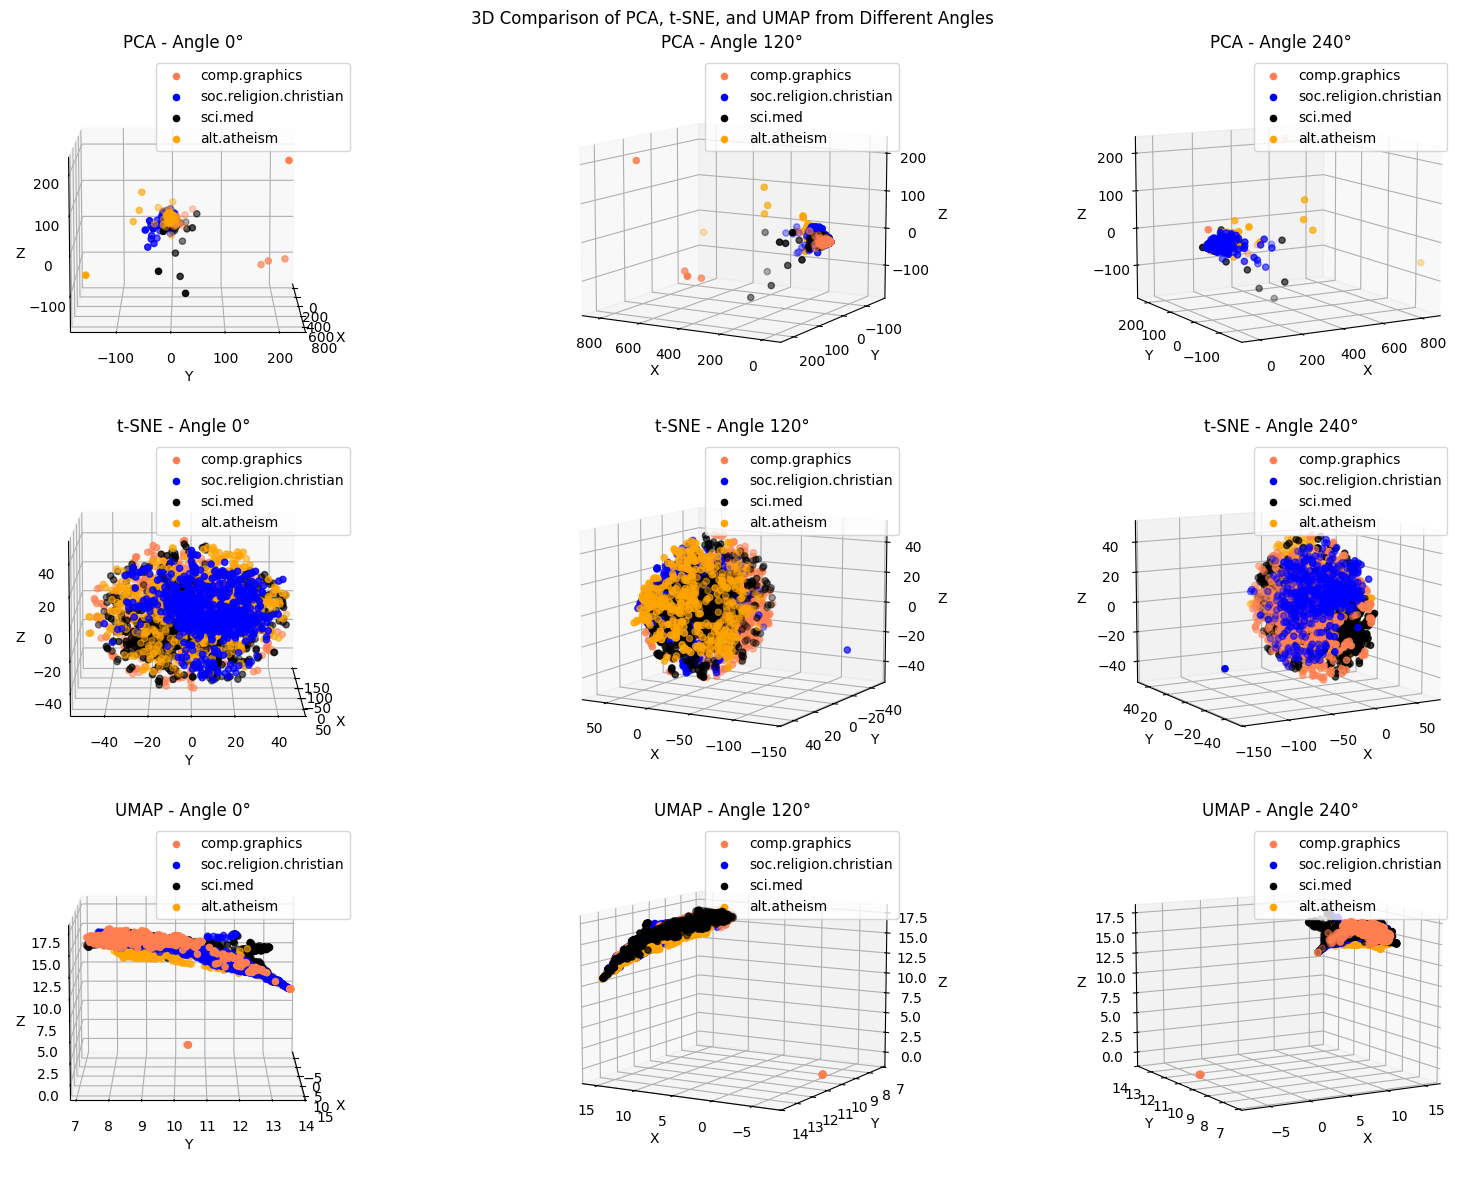

In [32]:
# Colors and categories for plotting
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

# Define a function to create a 3D scatter plot for each method
def plot_scatter_3d(ax, X_reduced, title, angle):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.view_init(elev=10., azim=angle)  # Set the viewing angle
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Create 3D plots for PCA, t-SNE, and UMAP with different angles
angles = [0, 120, 240]
fig = plt.figure(figsize=(18, 12))

# Plot PCA, t-SNE, and UMAP with multiple angles
for i, (X_reduced, method) in enumerate(zip([X_pca_aug, X_tsne_aug, X_umap_aug], ['PCA', 't-SNE', 'UMAP'])):
    for j, angle in enumerate(angles):
        ax = fig.add_subplot(3, 3, i * 3 + j + 1, projection='3d')
        plot_scatter_3d(ax, X_reduced, f'{method} - Angle {angle}°', angle)

fig.suptitle('3D Comparison of PCA, t-SNE, and UMAP from Different Angles')
plt.tight_layout()
plt.show()

Observed from 0 degrees, 120 degrees, and 240 degrees, `PCA`, `t-SNE` and `UMAP`, three of them seen from the three angles have the different distribution of categories.

---

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [33]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)

X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

In [34]:
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

                                      tokenized_text bin_category_name  
0  {M.P.Collier@uk.ac.city, application/PD, plott...      [0, 1, 0, 0]  
1  {which, get, inside, up, wholly, Bezier, made,...      [0, 1, 0, 0]  
2  {deal, up, Mr., They, broken,, eight, opinions...      [0, 0, 0, 1]  
3  {church, schools,, me, for, poland, this,, abo...      [0, 0, 0, 1]  
4  {which, those, heaven, many, therefore, were, ...      [0, 0, 0, 1]  
5  {>Christians, all!", >Jehovah's, intimidating,...      [0, 0, 0, 1]  
6  {Paul, definitely, actions,, feelings,, >accep...      [0, 0, 0, 1]  
7  {dip,, soften, >of, industry, kids, Any, contr...      [0, 0, 1, 0]  
8  {Yes,, remember, soon.", 2, Werner), were, tho...      [0, 0, 1, 0]

# Ans : 
Yes, it works. It has the same result as using the `category` column.

---

# New dataset

In [35]:
import pandas as pd

df_new = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
df_new

sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]

In [36]:
# check missing values
import helpers.data_mining_helpers as dmh
df_new.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [37]:
# check duplicate value
sum(df_new.duplicated('comment'))

1

In [38]:
# drop the duplicate value
df_new.drop_duplicates(keep="first", inplace=True)

In [39]:
# Feature Creation
import nltk
df_new['unigrams'] = df_new['comment'].apply(lambda x: dmh.tokenize_text(x))

In [40]:
df_new[0:4]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   

                                            unigrams  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [41]:
# document-term matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_new_counts = count_vect.fit_transform(df_new.comment) #learn the vocabulary and return document-term matrix

In [42]:
print(df_new_counts[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

In [43]:
count_vect.get_feature_names_out()[999]

'dizzy'

In [44]:
analyze = count_vect.build_analyzer()
analyze(df_new.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [45]:
# check the shape of matrix
df_new_counts.shape

(1499, 3730)

In [46]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

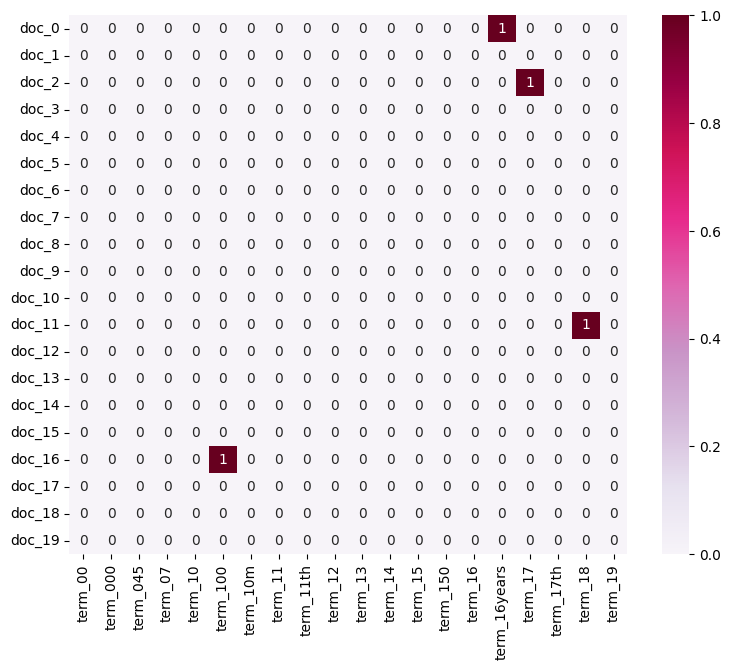

In [47]:
# plot the heatmap
import matplotlib.pyplot as plt
%matplotlib inline

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(df_new.index)[0:20]]
plot_z = df_new_counts[0:20, 0:20].toarray()

import seaborn as sns

df_new_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_new_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [48]:
# compute frequencies
import numpy as np

term_frequencies = []
for j in range(0,df_new_counts.shape[1]):
    term_frequencies.append(sum(df_new_counts[:,j].toarray()))

term_frequencies = np.asarray(df_new_counts.sum(axis=0))[0]

C:\Users\USER\AppData\Local\Temp\ipykernel_9152\559214301.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



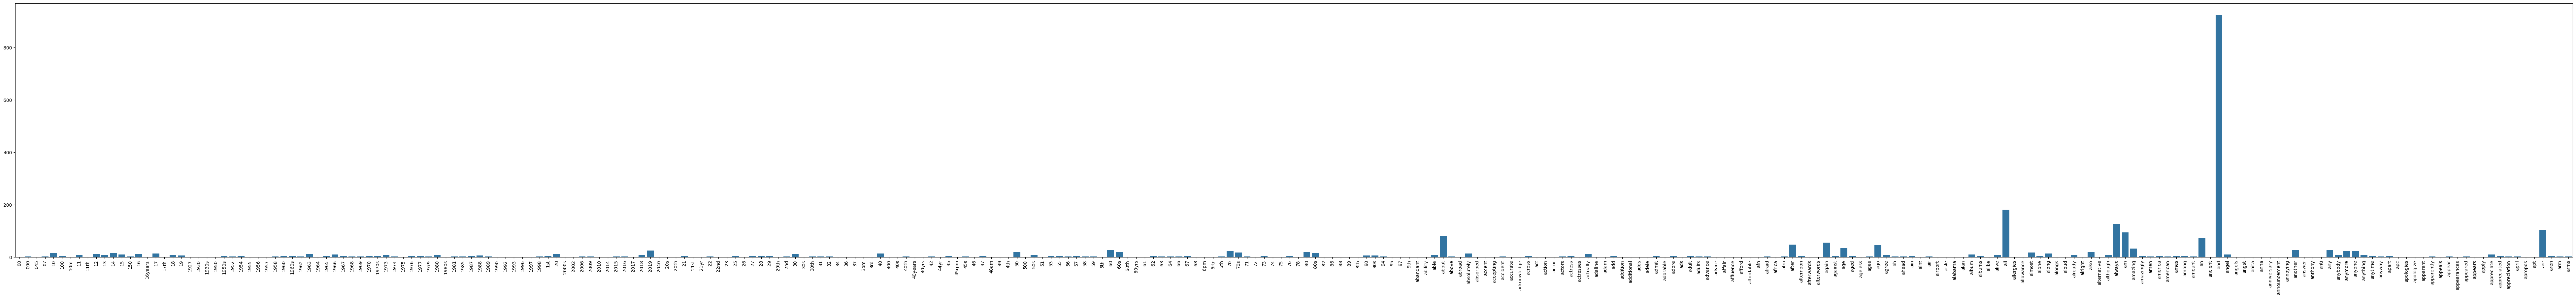

In [49]:
# frequencies plot
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

Finding frequent patterns

In [50]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df_new['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df_new[df_new['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df_new(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    df_new_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df_new = pd.DataFrame(df_new_counts.toarray(), columns=words)
    
    return term_document_df_new

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df_new(category_dfs[category])

In [51]:
# Display the filtered DataFrame for one of the categories
category_number=0
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
744     0         0      0        0    0    0        0      0  
745     0         0      0        0    0    0        0      0  
746     0         0      0        0    0    0        0      0  
747     1         0      0        0    0    0        0      0  
748     0         0      0        0    0    0        0      0  

[749 rows x 2602 columns]

In [52]:
category_number=1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


07  10  11  11th  12  13  14  15  16  17  ...  young  younger  youngster  \
0     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
1     0   0   0     0   0   0   0   0   0   1  ...      0        0          0   
2     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
3     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
4     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...    ...      ...        ...   
745   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
746   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
747   0   0   0     0   0   1   0   0   0   0  ...      0        0          0   
748   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
749   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   

     your  yours  youth  youthful  youtube  yrs  yup  
0       0      0      0         0        0    0    0  
1       0      0      0         0        0    0    0  
2       0      0      0         0        0    0    0  
3       1      0      0         0        0    0    0  
4       0      0      0         0        0    0    0  
..    ...    ...    ...       ...      ...  ...  ...  
745     0      0      0         0        0    0    1  
746     0      0      0         0        0    0    0  
747     0      0      0         0        0    0    0  
748     0      0      0         0        0    0    0  
749     0      0      0         0        0    0    0  

[750 rows x 2295 columns]

In [53]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df_new, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df_new.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df_new.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])


For category not nostalgia we filter the following words:
Bottom 1.0% words: 
20th           1
21st           1
21yr           1
28             1
30s            1
30th           1
32             1
37             1
1952           1
1955           1
1957           1
12             1
2010           1
2017           1
2018           1
2040           1
worthwhile     1
64             1
67             1
74             1
76             1
95             1
1930           1
1930s          1
wonderfully    1
wondering      1
dtype: int64
Top 5.0% words: 
them        23
amazing     23
got         23
wish        24
or          25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
1964          1
1969          1
1975          1
1980s         1
1981          1
wonderfull    1
wood          1
working       1
mad           1
maddox        1
madrid        1
maggie 

In [54]:
# Display the filtered DataFrame for one of the categories
category_number=0
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  14  15  150  ...  younger  youngest  \
0     0    0    0   0    0    0   0   0   0    0  ...        0         0   
1     0    0    0   0    0    0   0   0   0    0  ...        0         0   
2     0    0    0   0    0    0   0   0   0    0  ...        0         0   
3     0    0    0   0    0    0   0   0   0    0  ...        0         0   
4     0    0    0   0    0    0   0   0   0    0  ...        0         0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ...  ...      ...       ...   
744   0    0    0   0    0    0   0   0   0    0  ...        0         0   
745   0    0    0   0    0    0   0   0   0    0  ...        0         0   
746   0    0    0   0    0    0   0   0   0    0  ...        0         0   
747   0    0    0   0    0    0   0   0   0    0  ...        0         0   
748   0    0    0   0    0    0   0   0   0    0  ...        0         0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0             0         0      0        0    0    0        0      0  
1             0         0      0        0    0    0        0      0  
2             0         0      0        0    0    0        0      0  
3             0         0      0        0    0    0        0      0  
4             0         0      0        0    0    0        0      0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
744           0         0      0        0    0    0        0      0  
745           0         0      0        0    0    0        0      0  
746           0         0      0        0    0    0        0      0  
747           0         0      0        0    0    0        0      0  
748           0         0      0        0    0    0        0      0  

[749 rows x 2446 columns]

In [55]:
category_number=1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


07  10  11  11th  12  13  14  15  16  17  ...  yokel  younger  youngster  \
0     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
1     0   0   0     0   0   0   0   0   0   1  ...      0        0          0   
2     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
3     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
4     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...    ...      ...        ...   
745   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
746   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
747   0   0   0     0   0   1   0   0   0   0  ...      0        0          0   
748   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
749   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   

     your  yours  youth  youthful  youtube  yrs  yup  
0       0      0      0         0        0    0    0  
1       0      0      0         0        0    0    0  
2       0      0      0         0        0    0    0  
3       1      0      0         0        0    0    0  
4       0      0      0         0        0    0    0  
..    ...    ...    ...       ...      ...  ...  ...  
745     0      0      0         0        0    0    1  
746     0      0      0         0        0    0    0  
747     0      0      0         0        0    0    0  
748     0      0      0         0        0    0    0  
749     0      0      0         0        0    0    0  

[750 rows x 2159 columns]

In [56]:
# generate a CSV file for each category
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.227146505233723
Variance in Transaction Sizes : 52.30290397046961
Sparsity : 0.9959733855996001


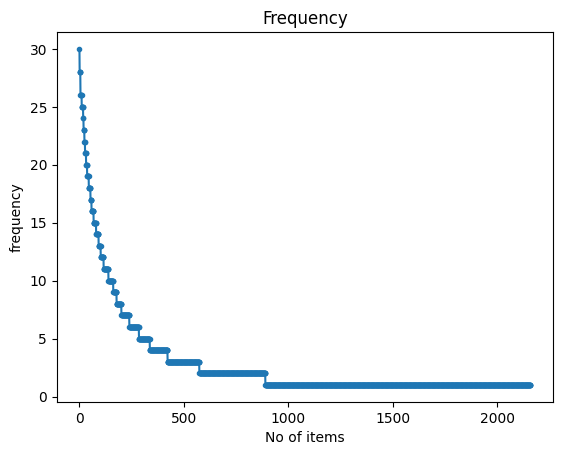

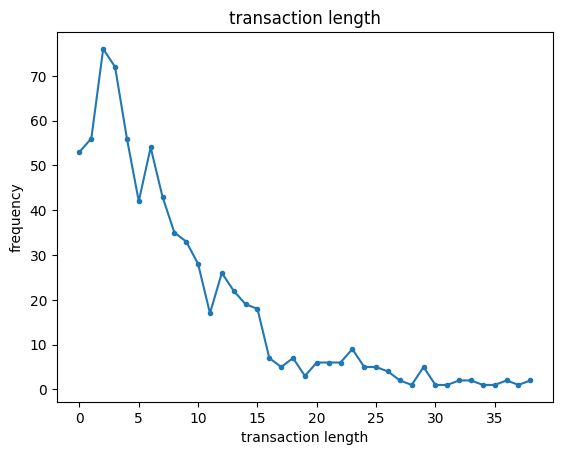

In [57]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 746
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.400804289544237
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.923683496167718
Variance in Transaction Sizes : 35.137126869028556
Sparsity : 0.9965654929315028


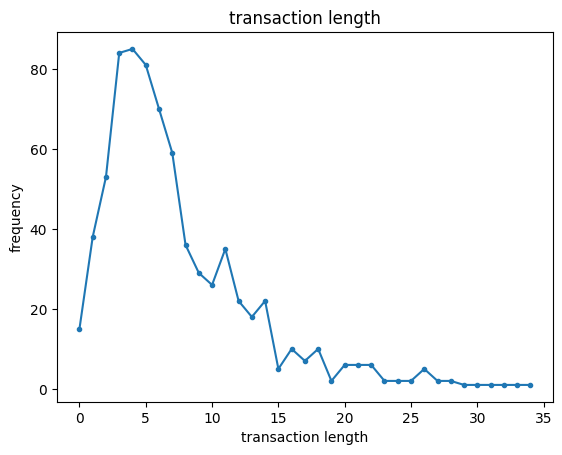

In [58]:
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [59]:
# use FAE Top-K Trials with k values of 500
from PAMI.frequentPattern.topk import FAE

# File containing the processed nostalgia category data
file_path = 'td_freq_db_nostalgia.csv'

topk_obj = FAE.FAE(iFile=file_path, k=500)
topk_obj.mine()
runtime = topk_obj.getRuntime()
nostalgia_TOP500_pattern_df_new = topk_obj.getPatternsAsDataFrame()
pattern_count = len(nostalgia_TOP500_pattern_df_new)
    
# Save the patterns DataFrame as a text file
output_filename = f'FAE_patterns_nostalgia_TOP500.txt'
nostalgia_TOP500_pattern_df_new.to_csv(output_filename, index=False, sep='\t')

print(f'FAE Top500: Found {pattern_count} patterns, Runtime: {runtime} seconds')
nostalgia_TOP500_pattern_df_new

 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top500: Found 500 patterns, Runtime: 0.1617281436920166 seconds


Patterns  Support
0      favorite       30
1          ever       28
2         would       28
3          will       28
4            go       28
..          ...      ...
495   don house        4
496   god bless        4
497  brenda lee        4
498      august        3
499      roller        3

[500 rows x 2 columns]

In [60]:
# File containing the processed not nostalgia category data
file_path = 'td_freq_db_not nostalgia.csv'

topk_obj = FAE.FAE(iFile=file_path, k=500)
topk_obj.mine()
runtime = topk_obj.getRuntime()
not_nostalgia_TOP500_pattern_df_new = topk_obj.getPatternsAsDataFrame()
pattern_count = len(not_nostalgia_TOP500_pattern_df_new)
    
# Save the patterns DataFrame as a text file
output_filename = f'FAE_patterns_not nostalgia_TOP500.txt'
not_nostalgia_TOP500_pattern_df_new.to_csv(output_filename, index=False, sep='\t')

print(f'FAE Top500: Found {pattern_count} patterns, Runtime: {runtime} seconds')
not_nostalgia_TOP500_pattern_df_new

 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top500: Found 500 patterns, Runtime: 0.17023587226867676 seconds


Patterns  Support
0      first       22
1      elvis       21
2      every       21
3      loved       21
4    classic       21
..       ...      ...
495    while        3
496     aren        3
497     line        3
498   beyond        3
499  soulful        3

[500 rows x 2 columns]

In [61]:
# find unique patterns
import pandas as pd

# group together all of the dataframes related to our found patterns
dfs_new = [nostalgia_TOP500_pattern_df_new, not_nostalgia_TOP500_pattern_df_new]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs_new:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs_new)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs_new = []
for df in dfs_new:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs_new.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df_new = pd.concat(filtered_dfs_new, ignore_index=True)

# Sort by support
final_pattern_df_new = final_pattern_df_new.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df_new)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
2       will       28
1      would       28
0       ever       28
8       wish       26
5       such       26
..       ...      ...
541     line        3
542   beyond        3
543  soulful        3
270   august        3
271   roller        3

[544 rows x 2 columns]
Number of patterns discarded: 456


In [62]:
# get augmented_df_new
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'comment' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_new_tdm = count_vect.fit_transform(df_new['comment'])
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df_new['tokenized_comment'] = df_new['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df_new.index, columns=final_pattern_df_new['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df_new['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df_new['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df_new = pd.DataFrame(df_new_tdm.toarray(), columns=terms, index=df_new.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df_new = pd.concat([tdm_df_new, pattern_matrix], axis=1)
augmented_df_new

00  000  045  07  10  100  10m  11  11th  12  ...  presley  davis  \
0      0    0    0   0   0    0    0   0     0   0  ...        0      0   
1      0    0    0   0   0    0    0   0     0   0  ...        0      0   
2      0    0    0   0   0    0    0   0     0   0  ...        0      0   
3      0    0    0   0   0    0    0   0     0   0  ...        0      0   
4      0    0    0   0   0    0    0   0     0   0  ...        0      0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...      ...    ...   
1495   0    0    0   0   0    0    0   0     0   0  ...        0      0   
1496   0    0    0   0   0    0    0   0     0   0  ...        0      0   
1497   0    0    0   0   0    0    0   0     0   0  ...        0      0   
1498   0    0    0   0   0    0    0   0     0   0  ...        0      0   
1499   0    0    0   0   0    0    0   0     0   0  ...        0      0   

      school  son  aren  line  beyond  soulful  august  roller  
0          0    0     0     0       0        0       0       0  
1          0    0     0     0       0        0       0       0  
2          0    0     0     0       0        0       0       0  
3          0    0     0     0       0        0       0       0  
4          0    0     0     0       0        0       0       0  
...      ...  ...   ...   ...     ...      ...     ...     ...  
1495       0    0     0     0       0        0       0       0  
1496       0    0     0     0       0        0       0       0  
1497       0    0     0     0       0        0       0       0  
1498       0    0     0     0       0        0       0       0  
1499       0    0     0     0       0        0       0       0  

[1499 rows x 4274 columns]

In [63]:
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Apply PCA, t-SNE, and UMAP to the data
df_new_pca_aug = PCA(n_components=2).fit_transform(augmented_df_new.values)
df_new_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df_new.values)
df_new_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df_new.values)

In [64]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = df_new['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, df_reduced, title):
    for c, category in zip(col, categories):
        xs = df_reduced[df_new['sentiment'] == category].T[0]
        ys = df_reduced[df_new['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_new_pca_aug, 'PCA')
plot_scatter(axes[1], df_new_tsne_aug, 't-SNE')
plot_scatter(axes[2], df_new_umap_aug, 'UMAP')

plt.show()

In [65]:
# binarization using the sentiment column
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(df_new.sentiment)

df_new['bin_sentiment'] = mlb.transform(df_new['sentiment']).tolist()
df_new[0:10]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   
9  not nostalgia  Elvis will always be number one no one can com...   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   
9  [Elvis, will, always, be, number, one, no, one...   

                                   tokenized_comment bin_sentiment  
0  {You, Thank, age, have, was, for, you, those, ...           [1]  
1  {kid, singing, Never, ever, was, beautiful, lo...           [0]  
2  {who, town, up, age, Mr., my, have, was, so, T...           [0]  
3  {Viet, who, hope, Thank, Now,, my, have, 1st, ...           [1]  
4  {of, who, him, everyday, to, reminds, mum, my,...           [0]  
5  {used, Every, got, me, death,, child,, many, t...           [0]  
6  {me, was, for, 70's, do, Time, the, a, it, but...           [0]  
7  {tunes, me, he, puts, in, feeling, love, the, ...           [0]  
8        {my, Wherever, you, always, heart, are, in}           [1]  
9  {will, number, the, place, close, to, come, no...           [1]

In [66]:
# Data Exploration
# retrieve 3 comment for a random record
comment_to_transform_1 = []
random_comment_1 = df_new.iloc[50]
random_comment_1 = random_comment_1['comment']
comment_to_transform_1.append(random_comment_1)

comment_to_transform_2 = []
random_comment_2 = df_new.iloc[100]
random_comment_2 = random_comment_2['comment']
comment_to_transform_2.append(random_comment_2)

comment_to_transform_3 = []
random_comment_3 = df_new.iloc[150]
random_comment_3 = random_comment_3['comment']
comment_to_transform_3.append(random_comment_3)

In [67]:
print(comment_to_transform_1)
print(comment_to_transform_2)
print(comment_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [68]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
comment_vector_count_1 = count_vect.transform(comment_to_transform_1)
comment_vector_count_2 = count_vect.transform(comment_to_transform_2)
comment_vector_count_3 = count_vect.transform(comment_to_transform_3)

# Binarize vectors to simplify: 0 for absence, 1 for presence
comment_vector_count_1_bin = binarize(comment_vector_count_1)
comment_vector_count_2_bin = binarize(comment_vector_count_2)
comment_vector_count_3_bin = binarize(comment_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(comment_vector_count_1.todense())
print(comment_vector_count_2.todense())
print(comment_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [69]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(comment_vector_count_1, comment_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(comment_vector_count_1, comment_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(comment_vector_count_2, comment_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(comment_vector_count_1, comment_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(comment_vector_count_2, comment_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(comment_vector_count_3, comment_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_9152\775646690.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_9152\775646690.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_9152\775646690.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_9152\775646690.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar i

In [70]:
# Data Classification
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Adding the "setiment category" column based on the "setiment"
df_new["sentiment category"] = df_new['sentiment'].apply(lambda x: 0 if x == "nostalgia" else 1)

# Create a mapping from numerical labels to category names
category_mapping = dict(df_new[['sentiment category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(tdm_df_new, df_new['sentiment category'], test_size=0.3, random_state=42)

In [71]:
X_train_new

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
486    0    0    0   0   0    0    0   0     0   0  ...      0         0   
528    0    0    0   0   0    0    0   0     0   0  ...      0         0   
200    0    0    0   0   0    0    0   0     0   0  ...      0         0   
890    0    0    0   0   0    0    0   0     0   0  ...      0         0   
845    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1131   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1295   0    0    0   0   0    0    0   0     0   0  ...      0         0   
861    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1460   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1127   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
486       0         0        0    0    0    0        0      0  
528       0         0        0    0    0    0        0      0  
200       0         0        0    0    0    0        0      0  
890       0         0        0    0    0    0        0      0  
845       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1131      0         0        0    0    0    0        0      0  
1295      0         0        0    0    0    0        0      0  
861       0         0        0    0    0    0        0      0  
1460      0         0        0    0    0    0        0      0  
1127      0         0        0    0    0    0        0      0  

[1049 rows x 3730 columns]

In [72]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_new, y_train_new)

# Make predictions on the test set
y_pred_new = nb_classifier.predict(X_test_new)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test_new, y_pred_new))
print("\nClassification Report using only the document-term frequency data:\n", classification_report(y_test_new, y_pred_new, target_names=target_names, digits=4))

Accuracy: 0.8688888888888889

Classification Report using only the document-term frequency data:
                precision    recall  f1-score   support

    nostalgia     0.8222    0.9528    0.8827       233
not nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



In [73]:
# Model with the augmented data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(augmented_df_new, df_new['sentiment category'], test_size=0.3, random_state=42)

In [74]:
X_train_new

00  000  045  07  10  100  10m  11  11th  12  ...  presley  davis  \
486    0    0    0   0   0    0    0   0     0   0  ...        0      0   
528    0    0    0   0   0    0    0   0     0   0  ...        0      0   
200    0    0    0   0   0    0    0   0     0   0  ...        0      0   
890    0    0    0   0   0    0    0   0     0   0  ...        0      0   
845    0    0    0   0   0    0    0   0     0   0  ...        0      0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...      ...    ...   
1131   0    0    0   0   0    0    0   0     0   0  ...        0      0   
1295   0    0    0   0   0    0    0   0     0   0  ...        0      0   
861    0    0    0   0   0    0    0   0     0   0  ...        0      0   
1460   0    0    0   0   0    0    0   0     0   0  ...        0      0   
1127   0    0    0   0   0    0    0   0     0   0  ...        0      0   

      school  son  aren  line  beyond  soulful  august  roller  
486        0    0     0     0       0        0       0       0  
528        0    0     0     0       0        0       0       0  
200        0    0     0     0       0        0       0       0  
890        0    0     0     0       0        0       0       0  
845        0    0     0     0       0        0       0       0  
...      ...  ...   ...   ...     ...      ...     ...     ...  
1131       0    0     0     0       0        0       0       0  
1295       0    0     0     0       0        0       0       0  
861        0    0     0     0       0        0       0       0  
1460       0    0     0     0       0        0       0       0  
1127       0    0     0     0       0        0       0       0  

[1049 rows x 4274 columns]

In [75]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_new, y_train_new)

# Make predictions on the test set
y_pred_new = nb_classifier.predict(X_test_new)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test_new, y_pred_new))
print("\nClassification Report using the augmented data:\n", classification_report(y_test_new, y_pred_new, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report using the augmented data:
                precision    recall  f1-score   support

    nostalgia     0.8435    0.9485    0.8929       233
not nostalgia     0.9362    0.8111    0.8691       217

     accuracy                         0.8822       450
    macro avg     0.8898    0.8798    0.8810       450
 weighted avg     0.8882    0.8822    0.8815       450



---

# Generate new data visualizations.

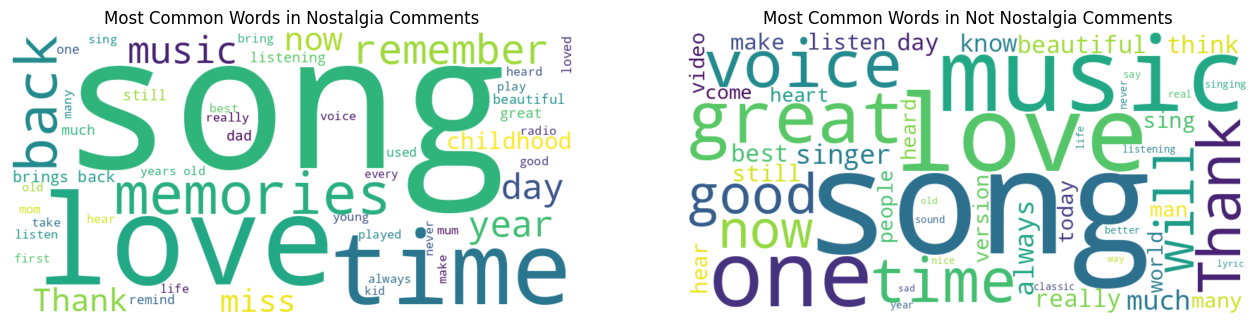

In [76]:
from collections import Counter
from wordcloud import WordCloud

# Separate comments by sentiment for word frequency analysis
nostalgia_comments = ' '.join(df_new[df_new['sentiment'] == 'nostalgia']['comment'])
not_nostalgia_comments = ' '.join(df_new[df_new['sentiment'] == 'not nostalgia']['comment'])

# Generate word clouds for each sentiment
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# WordCloud for nostalgia
wordcloud_nostalgia = WordCloud(width=800, height=400, max_words=50, background_color="white").generate(nostalgia_comments)
axes[0].imshow(wordcloud_nostalgia, interpolation='bilinear')
axes[0].set_title('Most Common Words in Nostalgia Comments')
axes[0].axis('off')

# WordCloud for not nostalgia
wordcloud_not_nostalgia = WordCloud(width=800, height=400, max_words=50, background_color="white").generate(not_nostalgia_comments)
axes[1].imshow(wordcloud_not_nostalgia, interpolation='bilinear')
axes[1].set_title('Most Common Words in Not Nostalgia Comments')
axes[1].axis('off')

plt.show()

---

# Generate TF-IDF features from the tokens of each text.

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the comments to generate the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df_new['comment'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

00  000  045   07   10  100  10m   11  11th   12  ...  yours  yourself  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...       ...   
1494  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1498  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
2       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
3       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
4       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1494    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1495    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1496    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1497    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1498    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  

[1499 rows x 3730 columns]

---

# Implement a simple Naive Bayes classifier that automatically classifies the records into their categories.

In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Adding the "setiment category" column based on the "setiment"
df_new["sentiment category"] = df_new['sentiment'].apply(lambda x: 0 if x == "nostalgia" else 1)

# Create a mapping from numerical labels to category names
category_mapping = dict(df_new[['sentiment category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets for TF-IDF features (70% train, 30% test)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(tfidf_matrix, df_new['sentiment category'], test_size=0.3, random_state=42)

# Convert the sparse matrix to dense for GaussianNB
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

In [79]:
# Train a Gaussian Naive Bayes classifier using TF-IDF features
nb_tfidf_gaussian = GaussianNB()
nb_tfidf_gaussian.fit(X_train_tfidf_dense, y_train)

# Predict and evaluate using GaussianNB with TF-IDF features
y_pred_tfidf_gaussian = nb_tfidf_gaussian.predict(X_test_tfidf_dense)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf_gaussian))
print("\nClassification Report using TF-IDF features:\n", classification_report(y_test, y_pred_tfidf_gaussian, target_names=target_names, digits=4))

Accuracy: 0.6577777777777778

Classification Report using TF-IDF features:
                precision    recall  f1-score   support

    nostalgia     0.6348    0.7983    0.7072       233
not nostalgia     0.7006    0.5069    0.5882       217

     accuracy                         0.6578       450
    macro avg     0.6677    0.6526    0.6477       450
 weighted avg     0.6666    0.6578    0.6498       450



In [80]:
# Generate word frequency features
count_vectorizer = TfidfVectorizer(use_idf=False, norm=None, binary=False)
df_new_count = count_vectorizer.fit_transform(df_new['comment'])

# Split the data into training and testing sets for word frequency features (70% train, 30% test)
X_train_count, X_test_count, y_train, y_test = train_test_split(df_new_count, df_new['sentiment category'], test_size=0.3, random_state=42)

# Convert the sparse matrix to dense for GaussianNB
X_train_count_dense = X_train_count.toarray()
X_test_count_dense = X_test_count.toarray()

In [81]:
# Train a Gaussian Naive Bayes classifier using word frequency features
nb_count_gaussian = GaussianNB()
nb_count_gaussian.fit(X_train_count_dense, y_train)

# Predict and evaluate using GaussianNB with word frequency features
y_pred_count_gaussian = nb_count_gaussian.predict(X_test_count_dense)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred_count_gaussian))
print("\nClassification Report using word frequency features:\n", classification_report(y_test, y_pred_count_gaussian, target_names=target_names, digits=4))

Accuracy: 0.6644444444444444

Classification Report using word frequency features:
                precision    recall  f1-score   support

    nostalgia     0.6314    0.8455    0.7229       233
not nostalgia     0.7391    0.4700    0.5746       217

     accuracy                         0.6644       450
    macro avg     0.6853    0.6578    0.6488       450
 weighted avg     0.6834    0.6644    0.6514       450



# comment
Using `GaussianNB()` as classifier on TF-IDF features and word frequency feature, the accuracy of using word frequency features is slightly higher than using TF-IDF features. But both these two are lower than when using `MultinomialNB()` as the classifier.

#  Improve the Data preprocessing in this lab
Using Text Cleaning technique like

`Lowercasing`: Convert all text to lowercase to ensure uniformity.

`Remove Punctuation`: Strip out any punctuation marks that may not contribute to the sentiment analysis.

`Stemming and Lemmatization`: Reduce words to their base forms to help in capturing root meanings.

`Length Outliers Detection`: Check for extremely long or short data, as they may introduce noise.

Using Text Feature Engineering technique like 

`Word Embeddings`: Convert text data into numerical vectors using word embeddings like Word2Vec.